# Assignment 1

## 1. Import data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv")
df = pd.DataFrame(data)
df.drop('date', axis=1, inplace=True)
df.style.set_properties(**{'font-size': '9pt'})

## 2.Determine the type of each column

In [3]:
df.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

### Numeric columns

In [4]:
df.select_dtypes('number').columns.tolist()

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

### Class columns

In [5]:
df.select_dtypes('object').columns.tolist()

['quarter', 'department', 'day']

## 3. Split train/test - using Stratified Split

In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(df, df["quarter"].fillna('Undefined')):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
    

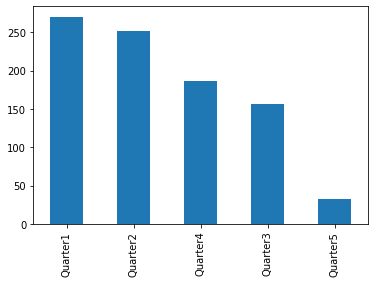

In [7]:
ax1 = strat_train_set["quarter"].value_counts().plot.bar()

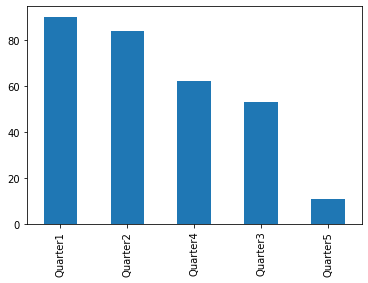

In [8]:
ax2 = strat_test_set["quarter"].value_counts().plot.bar()

In [9]:
strat_train_set

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
917,Quarter4,sweing,Tuesday,9,0.70,18.79,1068.0,3000,30,0.0,0,1,52.0,0.700257
182,Quarter2,sweing,Sunday,2,0.80,28.08,805.0,10530,63,0.0,0,0,58.5,0.800000
180,Quarter2,sweing,Sunday,6,0.80,11.41,887.0,5490,50,0.0,0,0,30.5,0.800344
1138,Quarter2,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.795388
143,Quarter2,finishing,Thursday,3,0.75,4.15,NaN,2160,0,0.0,0,0,12.0,0.712626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
516,Quarter5,finishing,Thursday,3,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.492500
142,Quarter2,finishing,Thursday,8,0.80,2.90,NaN,1440,0,0.0,0,0,8.0,0.735985
600,Quarter1,sweing,Wednesday,3,0.80,22.52,968.0,6840,113,0.0,0,0,57.0,1.000230


In [10]:
strat_test_set

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
888,Quarter4,sweing,Monday,12,0.80,15.26,1060.0,4080,63,0.0,0,0,34.0,0.800402
43,Quarter1,sweing,Sunday,6,0.80,11.61,539.0,6975,50,0.0,0,0,31.0,0.879714
1183,Quarter2,sweing,Wednesday,10,0.75,21.82,1674.0,6000,34,0.0,0,0,50.0,0.750608
771,Quarter3,finishing,Sunday,5,0.75,4.15,NaN,240,0,0.0,0,0,2.0,0.760833
939,Quarter4,sweing,Wednesday,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,0.581131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Quarter2,finishing,Monday,4,0.35,4.30,NaN,3240,0,0.0,0,0,18.0,0.942214
376,Quarter4,sweing,Thursday,10,0.75,22.52,1328.0,10080,55,0.0,0,0,56.0,0.800021
1173,Quarter2,finishing,Wednesday,12,0.80,4.60,NaN,2160,0,0.0,0,0,9.0,0.922840
515,Quarter5,sweing,Thursday,6,0.50,18.79,717.0,3960,23,0.0,0,0,33.0,0.500118


## 4. Build a pipeline

#### Slice train set into two dataframes

In [11]:
trainX = strat_train_set.loc[:,["quarter", "department", "day", "team", "targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]]
trainY = strat_train_set.loc[:,["actual_productivity"]]
trainX.shape, trainY.shape

((897, 13), (897, 1))

#### Histogram

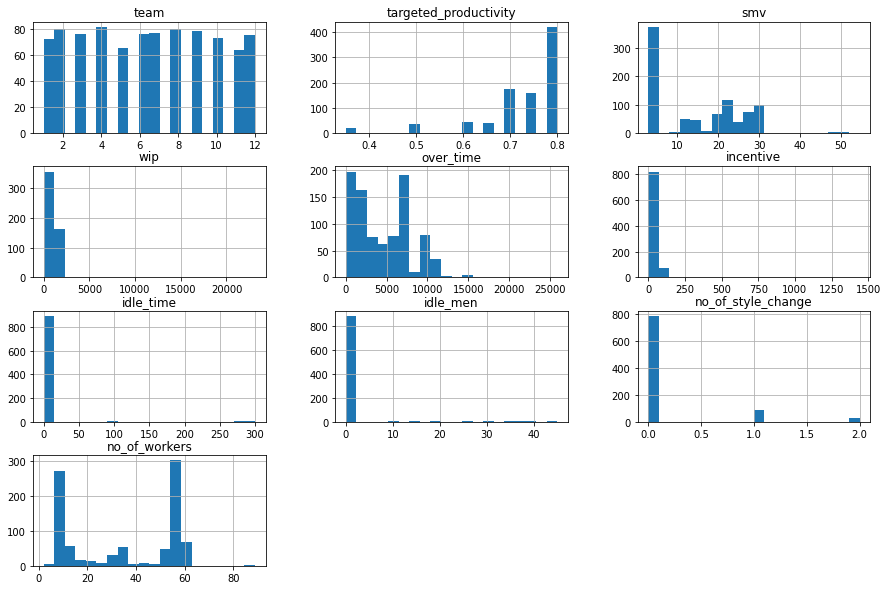

In [12]:
trainX.hist(bins=20, figsize=(15,10))
plt.show()

### 1. Impute then standardize numeric columns

In [13]:
num_cols = trainX.columns[(trainX.dtypes==np.int64) | (trainX.dtypes==np.float64)]

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

### 2. Impute then one hot encode class columns

In [14]:
cat_cols = trainX.columns[trainX.dtypes==object]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

### Combining two pipelines with column transformer

In [15]:
full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

### Transforming the data through the pipeline

In [16]:
trainX_prc = full_pipeline.fit_transform(trainX)
trainX_prc.shape

(897, 24)

### For testing data

In [17]:
testX = strat_test_set.loc[:,["quarter", "department", "day", "team", "targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]]
testY = strat_test_set.loc[:,["actual_productivity"]]

testX_prc = full_pipeline.transform(testX)  
testX_prc.shape
#dff=pd.DataFrame(testX_prc)
#dff

(300, 24)